In [ ]:
# Manipulation
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import plotly.express as px

# Stat
from scipy.stats import skewtest
from scipy import stats
from scipy.stats import boxcox

# ML
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import lightgbm as ltb



from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
df = pd.read_excel('Train_set.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Checking for NA

In [ ]:
df.isna().sum()
# Just 1 row needs to be removed

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Creating new columns


In [ ]:
day_of_journey = []
month_of_journey = []
year_of_journey = []

for i in range(len(df)):
  day_of_journey.append(int(df['Date_of_Journey'][i].split('/')[0]))
  month_of_journey.append(int(df['Date_of_Journey'][i].split('/')[1]))
  year_of_journey.append(int(df['Date_of_Journey'][i].split('/')[2]))

df['day_of_journey'] = day_of_journey
df['month_of_journey'] = month_of_journey
df['year_of_journey'] = year_of_journey


df = df.drop('Date_of_Journey', axis=1)

In [ ]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [ ]:
Dep_Time_hour = []
Dep_Time_minute = []

Arrival_Time_hour = []
Arrival_Time_minute = []

for i in range(len(df)):
  Dep_Time_hour.append(int(df['Dep_Time'][i].hour)+0.01)
  Dep_Time_minute.append(int(df['Dep_Time'][i].minute)+0.01)
  Arrival_Time_hour.append(int(df['Arrival_Time'][i].hour)+0.01)
  Arrival_Time_minute.append(int(df['Arrival_Time'][i].minute)+0.01)

df['Dep_Time_hour'] = Dep_Time_hour
df['Dep_Time_minute'] = Dep_Time_minute
df['Arrival_Time_hour'] = Arrival_Time_hour
df['Arrival_Time_minute'] = Arrival_Time_minute

df = df.drop('year_of_journey', axis=1)
df = df.drop('Dep_Time', axis=1)
df = df.drop('Arrival_Time', axis=1)

In [ ]:
Duration_hour = []
Duration_minute = []

for i in range(len(df)):
  Duration_hour.append(float(df['Duration'][i].split(' ')[0][0:-1]))
  if len(df['Duration'][i].split(' ')) > 1:
    Duration_minute.append(int(df['Duration'][i].split(' ')[1][0:-1]))
  else:
    Duration_minute.append(0.1)

df['Duration_hour'] = Duration_hour
df['Duration_minute'] = Duration_minute


df = df.drop('Duration', axis=1)


In [ ]:
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
categorical= df[cat_col]

In [ ]:
cont_col = [col for col in df.columns if df[col].dtypes != 'O']
continuous = df[cont_col]
continuous = continuous[['Price', 'day_of_journey', 'month_of_journey',
                         'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
                         'Arrival_Time_minute', 'Duration_hour', 'Duration_minute']]

In [ ]:
df = df.replace({'New Delhi': 'Delhi'})


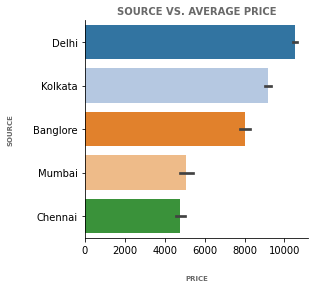

In [ ]:
# Average Source Price Graph

# Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'Price', y = 'Source', orient = "h", data=df, palette = "tab20", order = df.groupby(["Source"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('SOURCE VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('SOURCE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

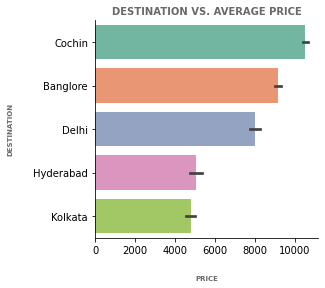

In [ ]:
# Average Destination Price Graph

# Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'Price', y = 'Destination', orient = "h", data=df, palette = "Set2", order = df.groupby(["Destination"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('DESTINATION VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('DESTINATION', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

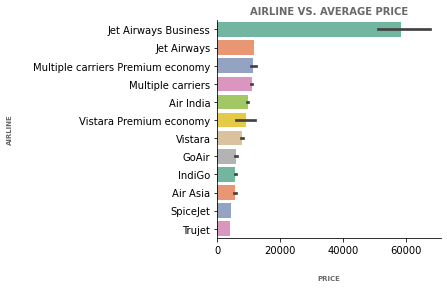

In [ ]:
# Average Ariline Price Graph

# Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'Price', y = 'Airline', orient = "h", data=df, palette = "Set2", order = df.groupby(["Airline"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('AIRLINE VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('AIRLINE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

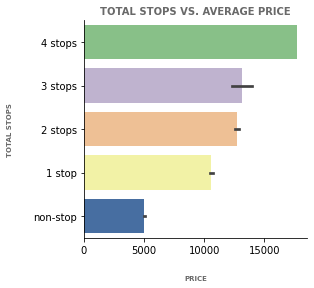

In [ ]:
# Average No. of Stops Price Graph

# Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'Price', y = 'Total_Stops', orient = "h", data=df, palette = "Accent", order = df.groupby(["Total_Stops"])["Price"].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('TOTAL STOPS VS. AVERAGE PRICE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PRICE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('TOTAL STOPS', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

## Correlation HeatMap

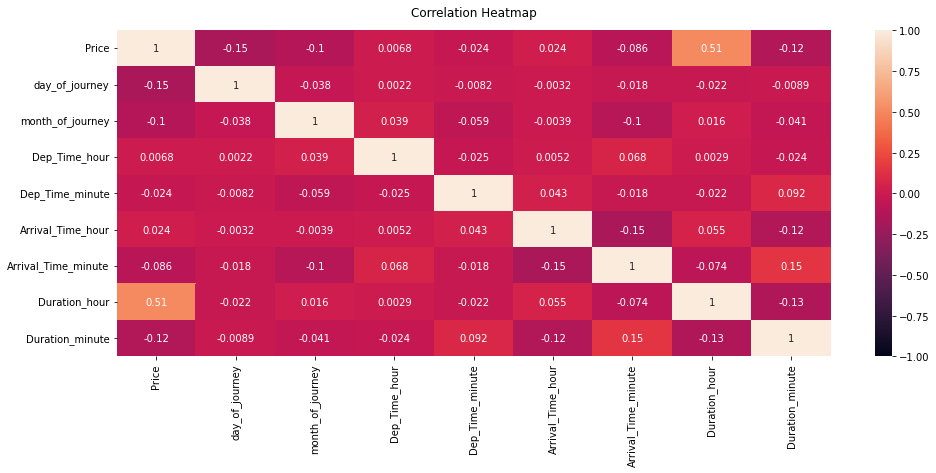

In [ ]:
continuous.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(continuous.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

## Remove Outliers

Price 23017.0 -5367.0
day_of_journey 43.5 -16.5
month_of_journey 10.5 -1.5
Dep_Time_hour 33.010000000000005 -6.990000000000004
Dep_Time_minute 92.50999999999999 -47.49
Arrival_Time_hour 35.510000000000005 -8.490000000000004
Arrival_Time_minute 72.50999999999999 -27.490000000000002
Duration_hour 34.5 -17.5
Duration_minute 90.0 -30.0


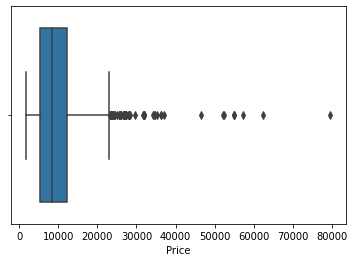

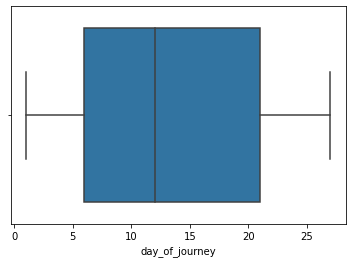

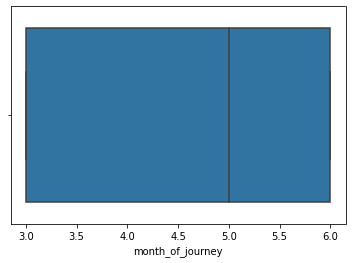

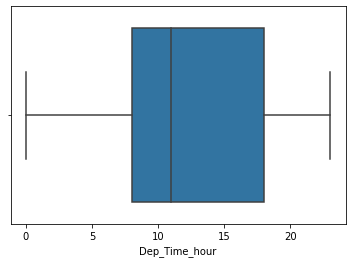

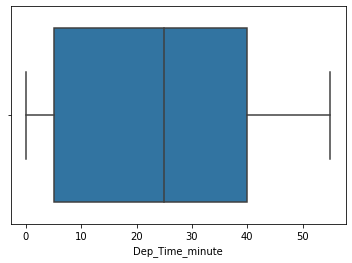

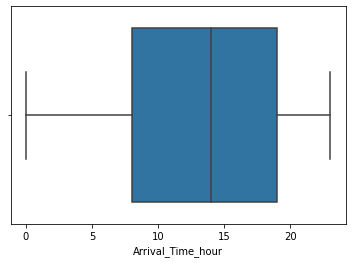

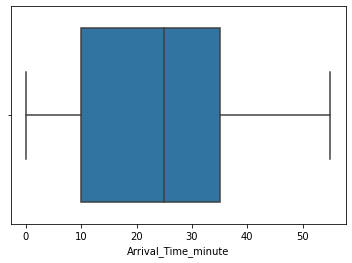

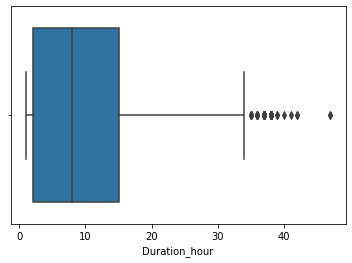

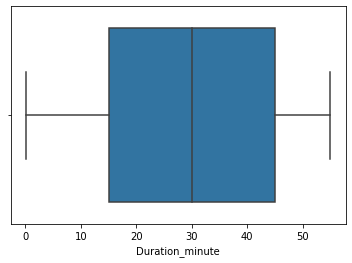

In [ ]:
for col in df:
  if df[col].dtypes != 'O':
    plt.figure()
    sns.boxplot(x=col, data=df)
    q75,q25 = np.percentile(df[col],[75,25])

    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    print(col, max,min )

    l = []
    for x in df[col]:
      if x >= max:
        l.append(np.percentile(df[col], 99))
      elif x <= min:
        l.append(np.percentile(df[col], 1))
      else:
        l.append(x)

    df[col] = l


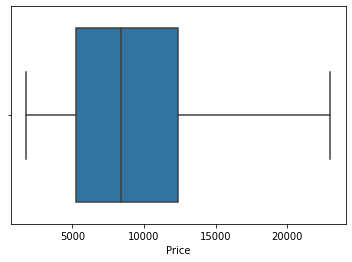

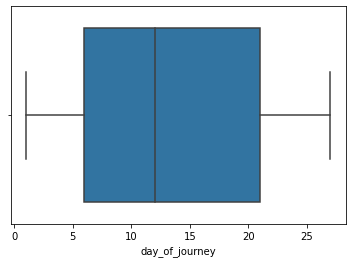

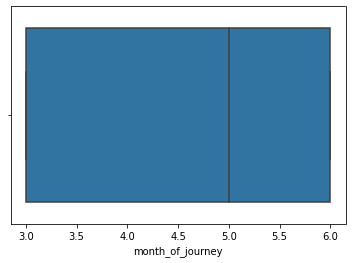

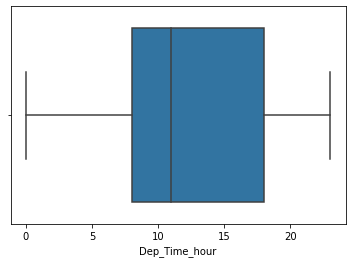

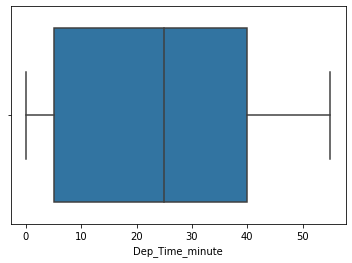

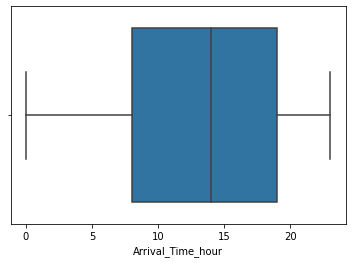

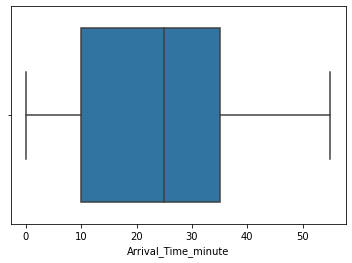

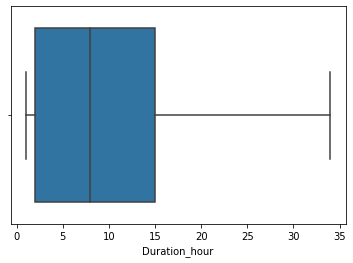

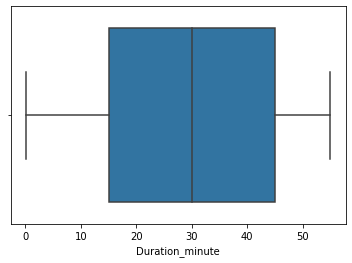

In [ ]:
for col in df:
  if df[col].dtypes != 'O':
    plt.figure()
    sns.boxplot(x=col, data=df)


## Check and Fix Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03e8138eb0>,
      dtype=object)

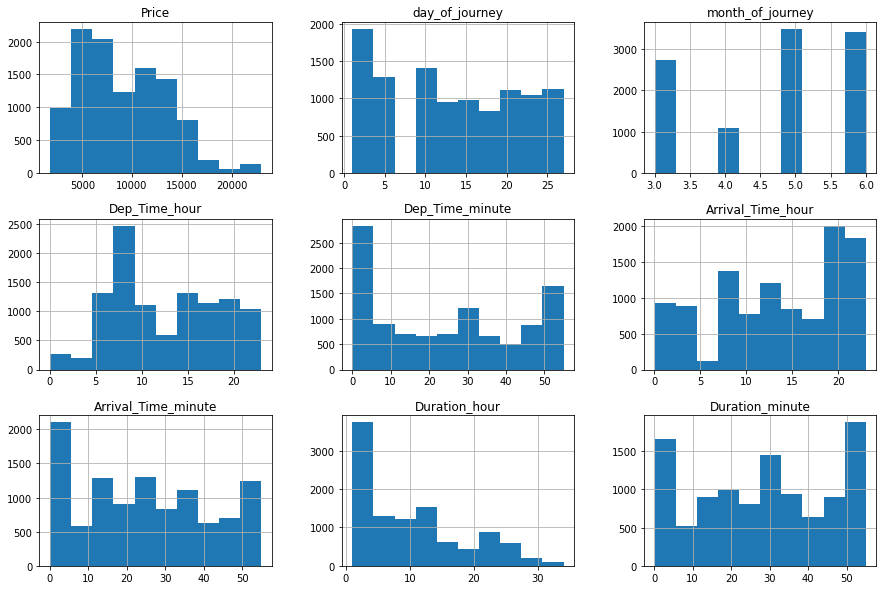

In [ ]:
df.hist(bins=10, figsize=(15, 10))

In [ ]:
for i in df:
  if df[i].dtypes != 'O':
    print(i,' with skewness of',continuous[i].skew())

Price  with skewness of 1.812404554693161
day_of_journey  with skewness of 0.11817431340418634
month_of_journey  with skewness of -0.3874094918617097
Dep_Time_hour  with skewness of 0.11292375090347503
Dep_Time_minute  with skewness of 0.16723399826716723
Arrival_Time_hour  with skewness of -0.37014605289011415
Arrival_Time_minute  with skewness of 0.11094494001142394
Duration_hour  with skewness of 0.8513019572218887
Duration_minute  with skewness of -0.08797438539988665


In [ ]:
for i in df:
  if df[i].dtypes != 'O':
    if df[i].skew() > 0.5 or df[i].skew() < -0.5:
        df[i],lmbda = boxcox(df[i],lmbda=None )


In [ ]:
for i in df:
  if df[i].dtypes != 'O':
    print(i,' with skewness of',df[i].skew())

Price  with skewness of -0.04510744433628858
day_of_journey  with skewness of 0.11817431340418634
month_of_journey  with skewness of -0.3874094918617097
Dep_Time_hour  with skewness of 0.11292375090347503
Dep_Time_minute  with skewness of 0.16723399826716723
Arrival_Time_hour  with skewness of -0.37014605289011415
Arrival_Time_minute  with skewness of 0.11094494001142394
Duration_hour  with skewness of -0.07936265026347422
Duration_minute  with skewness of -0.08797438539988665


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03e335f310>,
      dtype=object)

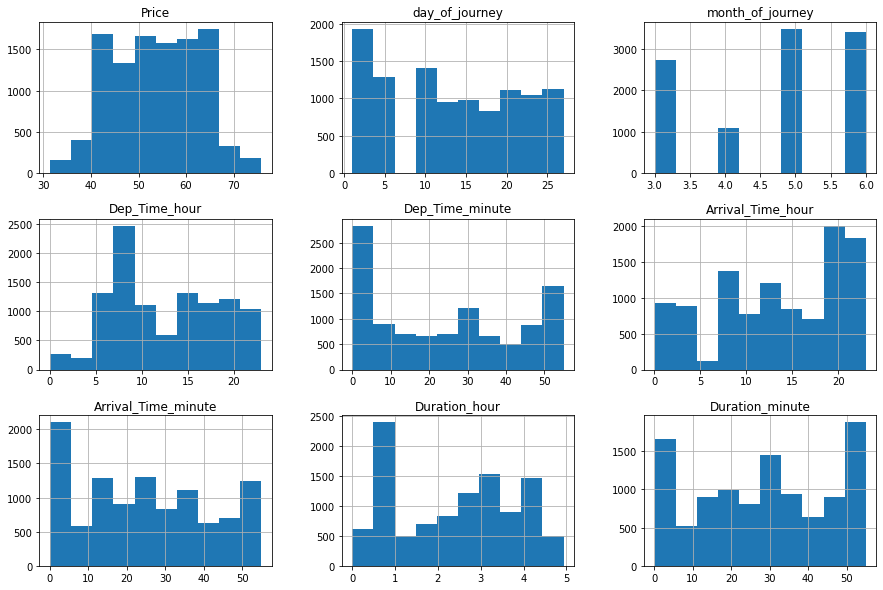

In [ ]:
df.hist(bins=10, figsize=(15, 10))

## Scaling Dataset


In [ ]:
airline = pd.get_dummies(df.Airline, prefix='Airline_')
df1 = pd.concat([df, airline], axis=1)


In [ ]:
source = pd.get_dummies(df.Source, prefix='Source_')
df1 = pd.concat([df1, source], axis=1)

destination = pd.get_dummies(df.Destination, prefix='Destination_')
df1 = pd.concat([df1, destination], axis=1)


In [ ]:
df1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_Time_hour,...,Source__Banglore,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai,Destination__Banglore,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,41.455508,24,3,22.01,...,1,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,52.301984,1,5,5.01,...,0,0,0,1,0,1,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,63.997583,9,6,9.01,...,0,0,1,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,48.696189,12,5,18.01,...,0,0,0,1,0,1,0,0,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,63.081037,1,3,16.01,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df1 = df1.replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4})
df1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_Time_hour,...,Source__Banglore,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai,Destination__Banglore,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,41.455508,24,3,22.01,...,1,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,52.301984,1,5,5.01,...,0,0,0,1,0,1,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,63.997583,9,6,9.01,...,0,0,1,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,48.696189,12,5,18.01,...,0,0,0,1,0,1,0,0,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,63.081037,1,3,16.01,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df1.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route', 'Airline__Trujet'], axis=1, inplace=True)

In [ ]:
df1.head()

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,...,Source__Banglore,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai,Destination__Banglore,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata
0,0,41.455508,24,3,22.01,20.01,1.01,10.01,0.738535,50.0,...,1,0,0,0,0,0,0,1,0,0
1,2,52.301984,1,5,5.01,50.01,13.01,15.01,2.332912,25.0,...,0,0,0,1,0,1,0,0,0,0
2,2,63.997583,9,6,9.01,25.01,4.01,25.01,3.889895,0.1,...,0,0,1,0,0,0,1,0,0,0
3,1,48.696189,12,5,18.01,5.01,23.01,30.01,1.868564,25.0,...,0,0,0,1,0,1,0,0,0,0
4,1,63.081037,1,3,16.01,50.01,21.01,35.01,1.575857,45.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df1.columns

Index(['Total_Stops', 'Price', 'day_of_journey', 'month_of_journey',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Airline__Air Asia', 'Airline__Air India', 'Airline__GoAir',
       'Airline__IndiGo', 'Airline__Jet Airways',
       'Airline__Jet Airways Business', 'Airline__Multiple carriers',
       'Airline__Multiple carriers Premium economy', 'Airline__SpiceJet',
       'Airline__Vistara', 'Airline__Vistara Premium economy',
       'Source__Banglore', 'Source__Chennai', 'Source__Delhi',
       'Source__Kolkata', 'Source__Mumbai', 'Destination__Banglore',
       'Destination__Cochin', 'Destination__Delhi', 'Destination__Hyderabad',
       'Destination__Kolkata'],
      dtype='object')

In [ ]:
X = df1.drop(columns='Price')
Y = df1['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=18)



In [ ]:
X.day_of_journey.value_counts()

9     1406
6     1287
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: day_of_journey, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=18, stratify=X.day_of_journey)


In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7477, 30), (3205, 30), (7477,), (3205,))

In [ ]:
#Check multicollinearity using VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
15,Airline__Multiple carriers,inf
16,Airline__Multiple carriers Premium economy,inf
28,Destination__Hyderabad,inf
27,Destination__Delhi,inf
26,Destination__Cochin,inf
25,Destination__Banglore,inf
24,Source__Mumbai,inf
23,Source__Kolkata,inf
22,Source__Delhi,inf
21,Source__Chennai,inf


Since there are variables that are one-hot encoded, these variables will have VIF value of inf. Hence, we will be considering just the numerical variables for feature reduction.

In [ ]:
# Listing categorical and numeric columns:
Num_col = list(X_train.select_dtypes(include=['float64', 'int64']).columns)
print('Numerical Variables:', Num_col)

Numerical Variables: ['Total_Stops', 'day_of_journey', 'month_of_journey', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour', 'Duration_minute']


In [ ]:
X_train_num = pd.DataFrame(X_train,
             columns=['Total_Stops', 'day_of_journey', 'month_of_journey', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour', 'Duration_minute'])

In [ ]:
X_train_num.head()

,Total_Stops,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
5053,1,21,5,21.01,10.01,19.01,50.01,4.143131,40.0
3388,1,1,6,18.01,15.01,12.01,35.01,3.798186,20.0
1672,1,6,3,6.01,0.01,19.01,15.01,3.264776,15.0
5610,1,24,5,18.01,55.01,18.01,15.01,4.221253,20.0
8130,1,9,5,9.01,50.01,21.01,5.01,3.002924,15.0


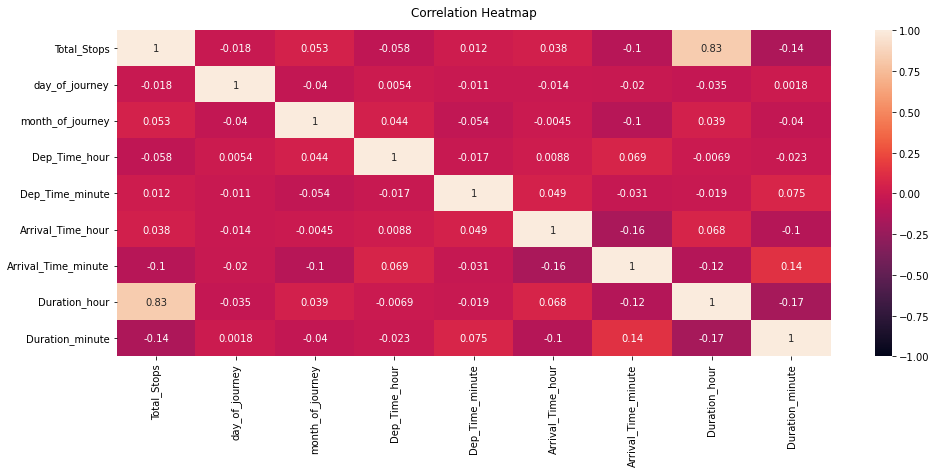

In [ ]:
X_train_num.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X_train_num.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

From the Correlation plot, we can visualise that there is a very strong correlation between Total_stops and Duration_hour. Hence, one of them needs to be dropped.

In [ ]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_num.columns
vif['VIF'] = [variance_inflation_factor(X_train_num.values, i) for i in range(X_train_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,Duration_hour,11.97
2,month_of_journey,9.99
0,Total_Stops,8.00
3,Dep_Time_hour,5.33
5,Arrival_Time_hour,4.38
8,Duration_minute,3.66
1,day_of_journey,3.23
6,Arrival_Time_minute,3.09
4,Dep_Time_minute,2.63


On calculating the VIF scores for the numerical data, we can see that there are a few varaibles that have a VIF score greater than 5, indicating autocorrelation. We try and drop Total_stop and month_of_journey. We will re-calculate the VIF to see if the autocorrelation has reduced.

In [ ]:
X_train_num = X_train_num.drop('Total_Stops', 1,)
X_train_num = X_train_num.drop('month_of_journey', 1,)

<ipython-input-309-c90fc13ced2c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_num = X_train_num.drop('Total_Stops', 1,)
<ipython-input-309-c90fc13ced2c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_num = X_train_num.drop('month_of_journey', 1,)


In [ ]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_num.columns
vif['VIF'] = [variance_inflation_factor(X_train_num.values, i) for i in range(X_train_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Dep_Time_hour,4.67
3,Arrival_Time_hour,3.98
6,Duration_minute,3.40
5,Duration_hour,3.25
0,day_of_journey,3.09
4,Arrival_Time_minute,3.01
2,Dep_Time_minute,2.59


We are able to see that all the VIF values are less than 5, and hence we can say that the autocorrelation has reduced.

In [ ]:
X_train = X_train.drop('Total_Stops', 1,)
X_train = X_train.drop('month_of_journey', 1,)

<ipython-input-311-5c377fd397fd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('Total_Stops', 1,)
<ipython-input-311-5c377fd397fd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('month_of_journey', 1,)


In [ ]:
modelo = ExtraTreesRegressor(random_state=49)
modelo.fit(X_train, Y_train)

# Print of Results
print(modelo.feature_importances_)

[7.52929486e-02 2.83629484e-02 2.94802604e-02 2.50577926e-02
 3.17408987e-02 4.42293812e-01 2.79209656e-02 7.82123922e-03
 1.84537572e-02 5.63134665e-03 2.34361824e-02 1.52090290e-01
 1.68800861e-03 1.05474283e-02 5.88834814e-04 1.42685836e-02
 6.28591612e-03 2.49663626e-04 5.73586211e-03 1.23366330e-03
 3.42879876e-02 4.22854462e-03 1.30678557e-02 4.76236543e-03
 1.71096155e-02 6.73023507e-03 1.03238984e-02 1.30909547e-03]


In [ ]:
feat_importances = pd.Series(modelo.feature_importances_, index=X_train.columns)

# Most important features
feat_importances.sort_values(ascending=False)

Duration_hour                                 0.442294
Airline__Jet Airways                          0.152090
day_of_journey                                0.075293
Source__Delhi                                 0.034288
Arrival_Time_minute                           0.031741
Dep_Time_minute                               0.029480
Dep_Time_hour                                 0.028363
Duration_minute                               0.027921
Arrival_Time_hour                             0.025058
Airline__IndiGo                               0.023436
Airline__Air India                            0.018454
Destination__Cochin                           0.017110
Airline__SpiceJet                             0.014269
Source__Mumbai                                0.013068
Airline__Multiple carriers                    0.010547
Destination__Hyderabad                        0.010324
Airline__Air Asia                             0.007821
Destination__Delhi                            0.006730
Airline__V

On checking the variable importance, we take the variables that have importance of atleast 0.5%. There are 21 such variables we will be using for predicting the Price.

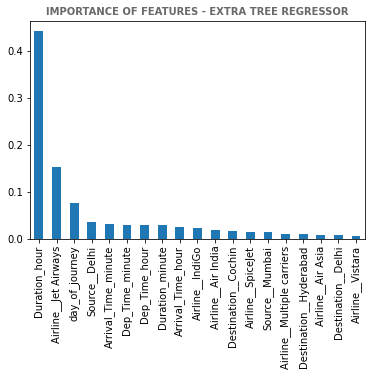

In [ ]:
# Graph of the most important variables - ExtraTreesRegressor
feat_importances = pd.Series(modelo.feature_importances_, index=X_train.columns)
feat_importances.nlargest(19).plot.bar()
plt.title('IMPORTANCE OF FEATURES - EXTRA TREE REGRESSOR', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.show()

In [ ]:
X_train = pd.DataFrame(X_train,
             columns=['Duration_hour',
                      'Airline__Jet Airways', 'Airline__IndiGo',
                      'Airline__SpiceJet', 'Airline__Air India',
                      'Airline__Multiple carriers', 'Airline__Air Asia', 'Airline__Vistara', 'Airline__GoAir',
                      'Source__Delhi', 'Source__Mumbai', 'Destination__Cochin', 'Destination__Delhi',
                      'Destination__Banglore', 'Destination__Hyderabad', 'Destination__Delhi',
                      'Dep_Time_hour', 'Dep_Time_minute', 'Duration_minute', 'day_of_journey',
                      'Arrival_Time_minute', 'Arrival_Time_hour'])


In [ ]:
X_train.head()

,Duration_hour,Airline__Jet Airways,Airline__IndiGo,Airline__SpiceJet,Airline__Air India,Airline__Multiple carriers,Airline__Air Asia,Airline__Vistara,Airline__GoAir,Source__Delhi,...,Destination__Delhi,Destination__Banglore,Destination__Hyderabad,Destination__Delhi,Dep_Time_hour,Dep_Time_minute,Duration_minute,day_of_journey,Arrival_Time_minute,Arrival_Time_hour
5053,4.143131,1,0,0,0,0,0,0,0,0,...,0,1,0,0,21.01,10.01,40.0,21,50.01,19.01
3388,3.798186,1,0,0,0,0,0,0,0,1,...,0,0,0,0,18.01,15.01,20.0,1,35.01,12.01
1672,3.264776,0,0,0,0,1,0,0,0,1,...,0,0,0,0,6.01,0.01,15.0,6,15.01,19.01
5610,4.221253,1,0,0,0,0,0,0,0,0,...,0,1,0,0,18.01,55.01,20.0,24,15.01,18.01
8130,3.002924,0,0,0,1,0,0,0,0,0,...,0,1,0,0,9.01,50.01,15.0,9,5.01,21.01


Initially we will evaluate several regression models without any hyperparameter through Cross Validation. The metric chosen for evaluation will be the R-square (R2), a statistical measure that represents the proportion of the variance of a dependent variable that is explained by an independent variable or variables in regression problems. Thus, the larger the R², the more explanatory the linear model is, that is, the better it fits the sample.

In [ ]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 49

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('LGBMRegressor', ltb.LGBMRegressor()))
models.append(('BaggingRegressor', BaggingRegressor()))

# Evaluating each model in a loop

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Model": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)

CPU times: user 1min 16s, sys: 2.98 s, total: 1min 19s
Wall time: 1min 19s


,Model,Mean,STD
7,LGBMRegressor,79.467978,1.419277
3,RandomForestRegressor,76.117942,1.463096
8,BaggingRegressor,74.737427,1.571600
2,GradientBoostingRegressor,73.131012,1.907151
5,DecisionTreeRegressor,65.893125,2.591294
0,LinearRegression,63.285689,1.599527
6,AdaBoostRegressor,60.603489,1.978222
1,KNeighborsRegressor,59.697138,2.796065
4,SVR,39.665472,1.277303


<ipython-input-318-33dc0dedf5de>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


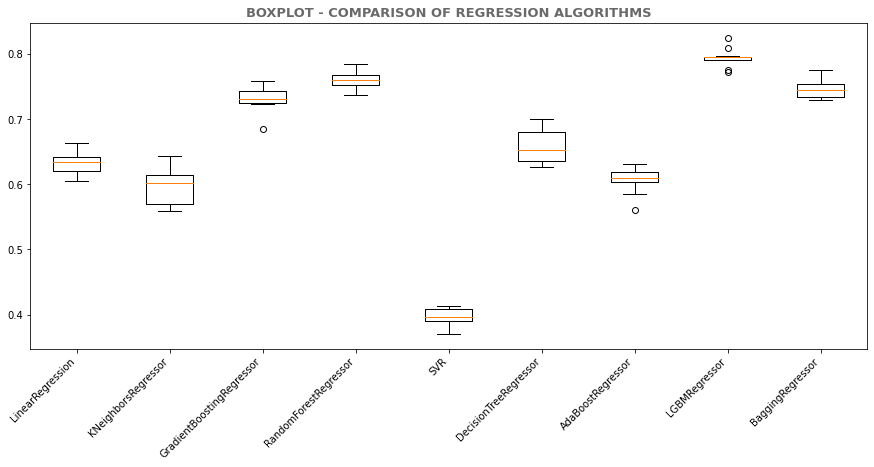

In [ ]:
# Boxplot to compare the algorithms

fig = plt.figure(figsize = (15,6))
plt.title('BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha='right')
plt.show();

In [ ]:
X_train_padr = X_train.copy()

In [ ]:
standardization = StandardScaler()

In [ ]:
num_col = ['Duration_hour', 'Dep_Time_hour', 'Dep_Time_minute', 'Duration_minute', 'day_of_journey', 'Arrival_Time_minute', 'Arrival_Time_hour']

In [ ]:
X_train_padr[num_col] = standardization.fit_transform(X_train[num_col])

In [ ]:
X_train_padr.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_hour,7477.0,9.312985e-17,1.000067,-1.687375,-1.163275,0.104613,0.793176,1.815409
Airline__Jet Airways,7477.0,3.621773e-01,0.480662,0.000000,0.000000,0.000000,1.000000,1.000000
Airline__IndiGo,7477.0,1.951317e-01,0.396329,0.000000,0.000000,0.000000,0.000000,1.000000
Airline__SpiceJet,7477.0,7.650127e-02,0.265816,0.000000,0.000000,0.000000,0.000000,1.000000
Airline__Air India,7477.0,1.623646e-01,0.368810,0.000000,0.000000,0.000000,0.000000,1.000000
Airline__Multiple carriers,7477.0,1.096697e-01,0.312498,0.000000,0.000000,0.000000,0.000000,1.000000
Airline__Air Asia,7477.0,2.955731e-02,0.169374,0.000000,0.000000,0.000000,0.000000,1.000000
Airline__Vistara,7477.0,4.614150e-02,0.209806,0.000000,0.000000,0.000000,0.000000,1.000000
Airline__GoAir,7477.0,1.645045e-02,0.127208,0.000000,0.000000,0.000000,0.000000,1.000000
Source__Delhi,7477.0,4.188846e-01,0.493409,0.000000,0.000000,0.000000,1.000000,1.000000


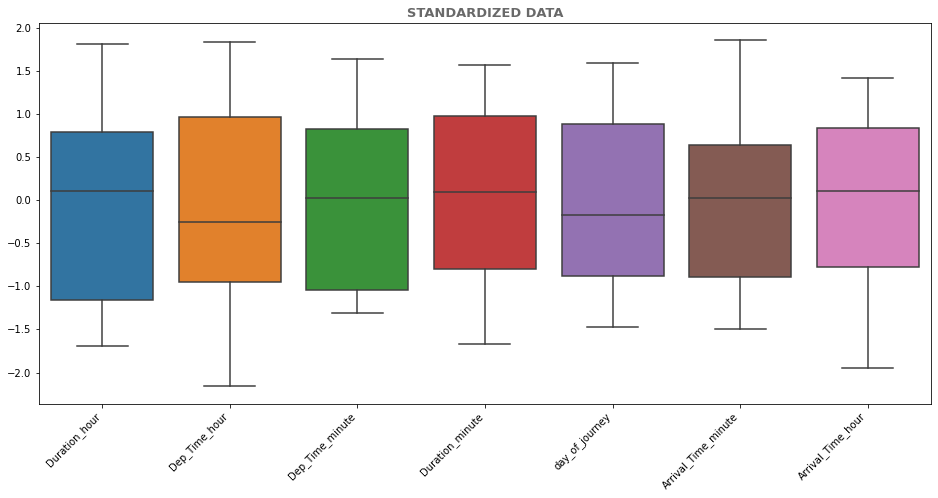

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.boxplot(data=X_train_padr[num_col])
plt.xticks(rotation=45, ha='right')
plt.title('STANDARDIZED DATA', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.show();

In [ ]:
X_train_padr = pd.DataFrame(X_train_padr,
             columns=['Duration_hour',
                      'Airline__Jet Airways', 'Airline__IndiGo',
                      'Airline__SpiceJet', 'Airline__Air India',
                      'Airline__Multiple carriers', 'Airline__Air Asia', 'Airline__Vistara', 'Airline__GoAir',
                      'Source__Delhi', 'Source__Mumbai', 'Destination__Cochin', 'Destination__Delhi',
                      'Destination__Banglore', 'Destination__Hyderabad', 'Destination__Delhi',
                      'Dep_Time_hour', 'Dep_Time_minute', 'Duration_minute', 'day_of_journey',
                      'Arrival_Time_minute', 'Arrival_Time_hour'])

In [ ]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('SVR', SVR()))


# Evaluating each model in a loop

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_padr, Y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Modelo": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)

CPU times: user 37.2 s, sys: 2.75 s, total: 39.9 s
Wall time: 39.1 s


,Modelo,Mean,STD
1,KNeighborsRegressor,73.942004,1.892478
2,SVR,69.498139,1.561935
0,LinearRegression,63.295470,2.124139


We tested algorithms that are not based on trees like KNeighborsRegressor, LinearRegression and SVR on normalized and standardized data and obtained an improvement in the results in both cases. However, tree-based models still showed the best results.


We will choose the three best models evaluated through Cross Validation to apply hyperparameter tuning.


In [ ]:
X_train.shape, X_test.shape

((7477, 22), (3205, 30))

In [ ]:
X_test = pd.DataFrame(X_test,
             columns=['Duration_hour',
                      'Airline__Jet Airways', 'Airline__IndiGo',
                      'Airline__SpiceJet', 'Airline__Air India',
                      'Airline__Multiple carriers', 'Airline__Air Asia', 'Airline__Vistara', 'Airline__GoAir',
                      'Source__Delhi', 'Source__Mumbai', 'Destination__Cochin', 'Destination__Delhi',
                      'Destination__Banglore', 'Destination__Hyderabad', 'Destination__Delhi',
                      'Dep_Time_hour', 'Dep_Time_minute', 'Duration_minute', 'day_of_journey',
                      'Arrival_Time_minute', 'Arrival_Time_hour'])

In [ ]:
%%time

# Evaluation of Predictive Models

# Metrics

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []

# List of models

models = []
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('LGBMRegressor', ltb.LGBMRegressor()))
models.append(('BaggingRegressor', BaggingRegressor()))
# Evaluating each model in a loop

names = []

for name, model in models:

    model.fit(X_train, Y_train)

    pred = model.predict(X_test)

    RSquared1.append(metrics.r2_score(Y_test, pred)*100)
    MAE1.append(metrics.mean_absolute_error(Y_test, pred))
    MSE1.append(metrics.mean_squared_error(Y_test, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(Y_test, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(Y_test, pred)*100)
    names.append(name)

# Results

model_resul = pd.DataFrame({
    'Model': names,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)

CPU times: user 3.8 s, sys: 35.5 ms, total: 3.84 s
Wall time: 3.73 s


,Model,R-Squared,MAE,MSE,RMSE,MAPE
2,LGBMRegressor,81.137525,2.997077,15.636503,3.954302,5.546313
1,RandomForestRegressor,78.601396,2.996306,17.738888,4.211756,5.538868
3,BaggingRegressor,77.108681,3.069980,18.976310,4.356181,5.670148
0,GradientBoostingRegressor,74.761685,3.534812,20.921909,4.574047,6.517816
